In [1]:
import json
import requests as req
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
def get_json(api_url):
    response = req.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode("utf-8"))
    else:
        return None

In [3]:
# df_covid_worlwide = pd.read_json("https://dqlab.id/data/covid19_worldwide_2020.json")
df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
display(df_covid_worlwide.info())
display(df_covid_worlwide.head())
# display(df_covid_worlwide.loc[df_covid_worlwide["date"] >= "2020-08-07"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   61900 non-null  object
 1   daily_confirmed_cases  61900 non-null  int64 
 2   daily_deaths           61900 non-null  int64 
 3   confirmed_cases        61900 non-null  int64 
 4   deaths                 61900 non-null  int64 
 5   geo_id                 61625 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.8+ MB


None

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
0,2020-03-20,1,0,1,0,TD
1,2020-03-21,0,0,1,0,TD
2,2020-03-22,1,0,2,0,TD
3,2020-03-23,0,0,2,0,TD
4,2020-03-24,0,0,2,0,TD


In [4]:
df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")

df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()
display(df_covid_worlwide.head())

print("Jumlah missing value tiap kolom : ")
display(df_covid_worlwide.isnull().sum())

df_covid_worlwide.dropna(inplace=True)

print("Jumlan missing value tiap kolom setelah didrop")
display(df_covid_worlwide.isnull().sum())

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


Jumlah missing value tiap kolom : 


daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

Jumlan missing value tiap kolom setelah didrop


daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64

## Membaca Data Countries

In [5]:
countries_url = "https://dqlab.id/data/country_details.json"
df_countries = pd.read_json(countries_url)
# df_countries.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv", index=None, header=True)
# df_countries.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\File Excel\country_details.xlsx", index=None, header=True)

display(df_countries.head())

,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


## Merge Covid19 Data dan Countries

In [6]:
import numpy as np
import pandas as pd

df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()

df_countries = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv")

display(df_covid_worlwide.head())
display(df_countries.head())


df_covid_denormalized = (df_covid_worlwide.reset_index().merge(df_countries, how="inner", on="geo_id")).set_index("date").sort_index()
display(df_covid_denormalized.head(10))

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,IN,India
2019-12-31,0,0,0,0,MC,Monaco
2019-12-31,0,0,0,0,BE,Belgium
2019-12-31,27,0,27,0,CN,China
2019-12-31,0,0,0,0,NL,Netherlands
2019-12-31,0,0,0,0,IQ,Iraq
2019-12-31,0,0,0,0,FR,France
2019-12-31,0,0,0,0,NZ,New_Zealand
2019-12-31,0,0,0,0,NG,Nigeria


## Menghitung Fatality Ratio

In [7]:
import numpy as np
import pandas as pd

df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()

df_countries = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv")

display(df_covid_worlwide.head())
display(df_countries.head())


df_covid_denormalized = (df_covid_worlwide.reset_index().merge(df_countries, how="inner", on="geo_id")).set_index("date").sort_index()

df_covid_denormalized["fatality_ratio"] = (df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"])
display(df_covid_denormalized.info())
display(df_covid_denormalized.head(10))

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id
date,,,,,
2019-12-31,0,0,0,0,IN
2019-12-31,0,0,0,0,IR
2019-12-31,0,0,0,0,PK
2019-12-31,0,0,0,0,AM
2019-12-31,27,0,27,0,CN


,geo_id,country_name
0,TD,Chad
1,CU,Cuba
2,FJ,Fiji
3,GU,Guam
4,IR,Iran


<class 'pandas.core.frame.DataFrame'>
Index: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   daily_confirmed_cases  61900 non-null  int64  
 1   daily_deaths           61900 non-null  int64  
 2   confirmed_cases        61900 non-null  int64  
 3   deaths                 61900 non-null  int64  
 4   geo_id                 61625 non-null  object 
 5   country_name           61900 non-null  object 
 6   fatality_ratio         58930 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 3.8+ MB


None

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2019-12-31,0,0,0,0,MC,Monaco,NaN
2019-12-31,0,0,0,0,BE,Belgium,NaN
2019-12-31,27,0,27,0,CN,China,0.0
2019-12-31,0,0,0,0,NL,Netherlands,NaN
2019-12-31,0,0,0,0,IQ,Iraq,NaN
2019-12-31,0,0,0,0,FR,France,NaN
2019-12-31,0,0,0,0,NZ,New_Zealand,NaN
2019-12-31,0,0,0,0,NG,Nigeria,NaN


## Negara-negara dengan Fatality Ratio Tertinggi

In [8]:
import numpy as np
import pandas as pd

df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()

df_countries = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv")

# display(df_covid_worlwide.head())
# display(df_countries.head())


df_covid_denormalized = (df_covid_worlwide.reset_index().merge(df_countries, how="inner", on="geo_id")).set_index("date").sort_index()

df_covid_denormalized["fatality_ratio"] = (df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"])

df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
display(df_top_20_fatality_rate.head())
display(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-15,0,1,1,1,SD,Sudan,1.0
2020-03-18,0,0,1,1,SD,Sudan,1.0
2020-03-16,0,0,1,1,SD,Sudan,1.0
2020-03-13,1,1,1,1,GY,Guyana,1.0
2020-02-20,2,2,2,2,IR,Iran,1.0


,geo_id,country_name,fatality_ratio
date,,,
2020-03-15,SD,Sudan,1.0
2020-03-18,SD,Sudan,1.0
2020-03-16,SD,Sudan,1.0
2020-03-13,GY,Guyana,1.0
2020-02-20,IR,Iran,1.0
2020-03-16,GT,Guatemala,1.0
2020-03-17,SD,Sudan,1.0
2020-03-24,SD,Sudan,0.5
2020-03-25,ZW,Zimbabwe,0.5


## Kondisi Fatality ratio Tertinggi di Bulan Agustus 2020

In [9]:
import numpy as np
import pandas as pd

df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()

df_countries = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv")

# display(df_covid_worlwide.head())
# display(df_countries.head())


df_covid_denormalized = (df_covid_worlwide.reset_index().merge(df_countries, how="inner", on="geo_id")).set_index("date").sort_index()

df_covid_denormalized["fatality_ratio"] = (df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"])

display(df_covid_denormalized.head())
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08-01" : "2020-08-31"].groupby("country_name").sum()
display(df_covid_denormalized_august.head(10))
df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]
display(df_covid_denormalized_august.head(10))
df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values("fatality_ratio", ascending=False).head(20)
display(df_top_20_fatality_rate_on_august)

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2019-12-31,0,0,0,0,IN,India,NaN
2019-12-31,0,0,0,0,MC,Monaco,NaN
2019-12-31,0,0,0,0,BE,Belgium,NaN
2019-12-31,27,0,27,0,CN,China,0.0
2019-12-31,0,0,0,0,NL,Netherlands,NaN


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,fatality_ratio
country_name,,,,,
Afghanistan,1620,131,1161878,41919,1.118164
Albania,4183,126,226041,6818,0.937033
Algeria,14315,301,1171031,42128,1.120963
Andorra,202,1,31133,1631,1.629401
Angola,1546,59,56404,2523,1.392195
Anguilla,0,0,93,0,0.000000
Antigua_and_Barbuda,3,0,2879,93,1.001515
Argentina,222243,5090,8794287,175288,0.611334
Armenia,5200,139,1281310,25277,0.611319


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,fatality_ratio
country_name,,,,,
Afghanistan,1620,131,1161878,41919,0.036079
Albania,4183,126,226041,6818,0.030163
Algeria,14315,301,1171031,42128,0.035975
Andorra,202,1,31133,1631,0.052388
Angola,1546,59,56404,2523,0.044731
Anguilla,0,0,93,0,0.000000
Antigua_and_Barbuda,3,0,2879,93,0.032303
Argentina,222243,5090,8794287,175288,0.019932
Armenia,5200,139,1281310,25277,0.019727


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,fatality_ratio
country_name,,,,,
Yemen,227,77,57391,16441,0.286473
Italy,21060,345,7897945,1094804,0.138619
France,91370,352,6834388,943004,0.137979
United_Kingdom,32166,330,9843011,1281831,0.130228
Belgium,15816,185,2431271,304102,0.125079
Hungary,1456,18,153086,18802,0.122820
Netherlands,16108,75,1925481,191217,0.099309
Mexico,166047,18158,17473585,1731487,0.099092
Jersey,39,1,10995,975,0.088677


## Visualisasi Negara dengan Fatality Ratio Tertinggi di Bulan Agustus 2020

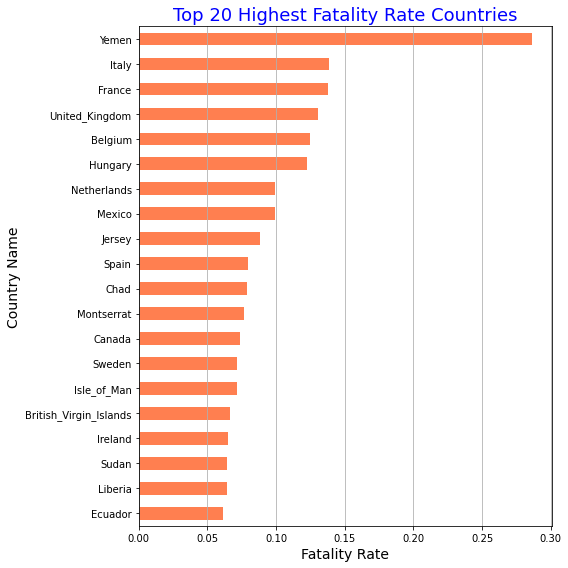

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_covid_worlwide = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv")
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index()

df_countries = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv")

# display(df_covid_worlwide.head())
# display(df_countries.head())


df_covid_denormalized = (df_covid_worlwide.reset_index().merge(df_countries, how="inner", on="geo_id")).set_index("date").sort_index()

df_covid_denormalized["fatality_ratio"] = (df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"])

# display(df_covid_denormalized.head())
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08-01" : "2020-08-31"].groupby("country_name").sum()
# display(df_covid_denormalized_august.head(10))
df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]
# display(df_covid_denormalized_august.head(10))
df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values("fatality_ratio", ascending=False).head(20)
# display(df_top_20_fatality_rate_on_august)

plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## Data Frame Kasus COVID-19 ASEAN

In [29]:
import numpy as np
import pandas as pd

covid_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv"
countries_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv"

df_covid_worlwide = pd.read_csv(covid_url)
df_countries = pd.read_csv(countries_url)
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index().dropna()

df_covid_denormalized = pd.merge(df_covid_worlwide.reset_index(), df_countries, how="inner", on="geo_id").set_index("date").sort_index()

# display(df_covid_worlwide.head())
# display(df_countries.head())
# display(df_covid_denormalized)

# asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
# filter_list = [(df_covid_denormalized["geo_id"] == country_id).to_numpy for country_id in asean_country_id]
# filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
# df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

# print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
# print(df_covid_denormalized_asean.head())

In [32]:
import numpy as np
import pandas as pd

covid_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv"
countries_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv"

df_covid_worlwide = pd.read_csv(covid_url)
df_countries = pd.read_csv(countries_url)
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index().dropna()

df_covid_denormalized = pd.merge(df_covid_worlwide.reset_index(), df_countries, how="inner", on="geo_id").set_index("date").sort_index()

# display(df_covid_worlwide.head())
# display(df_countries.head())
# display(df_covid_denormalized)

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]

df_covid_denormalized_asean = df_covid_denormalized.loc[df_covid_denormalized["geo_id"].isin(asean_country_id)]
display(df_covid_denormalized_asean.head(10))
display(df_covid_denormalized_asean["country_name"].unique())

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,ID,Indonesia
2019-12-31,0,0,0,0,SG,Singapore
2020-01-01,0,0,0,0,MY,Malaysia
2020-01-01,0,0,0,0,SG,Singapore
2020-01-01,0,0,0,0,ID,Indonesia
2020-01-01,0,0,0,0,TH,Thailand


array(['Vietnam', 'Malaysia', 'Thailand', 'Indonesia', 'Singapore'],
      dtype=object)

## Kapankah Kasus Pertama COVID-19 di ASEAN

In [39]:
import numpy as np
import pandas as pd

covid_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv"
countries_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv"

df_covid_worlwide = pd.read_csv(covid_url)
df_countries = pd.read_csv(countries_url)
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index().dropna()

df_covid_denormalized = pd.merge(df_covid_worlwide.reset_index(), df_countries, how="inner", on="geo_id").set_index("date").sort_index()

# display(df_covid_worlwide.head())
# display(df_countries.head())
# display(df_covid_denormalized)

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]

df_covid_denormalized_asean = df_covid_denormalized.loc[df_covid_denormalized["geo_id"].isin(asean_country_id)].sort_index()
display(df_covid_denormalized_asean.head())

print("Kapankah Kasus Pertama COVID-19 di ASEAN")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"] == country_id]
    first_case =  asean_country[asean_country["confirmed_cases"] > 0][["confirmed_cases","geo_id","country_name"]]
    display(first_case.head(1))

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,ID,Indonesia
2019-12-31,0,0,0,0,SG,Singapore


Kapankah Kasus Pertama COVID-19 di ASEAN


,confirmed_cases,geo_id,country_name
date,,,
2020-03-02,2,ID,Indonesia


,confirmed_cases,geo_id,country_name
date,,,
2020-01-25,3,MY,Malaysia


,confirmed_cases,geo_id,country_name
date,,,
2020-01-24,3,SG,Singapore


,confirmed_cases,geo_id,country_name
date,,,
2020-01-13,1,TH,Thailand


,confirmed_cases,geo_id,country_name
date,,,
2020-01-24,2,VN,Vietnam


## Kasus Covid-19 di ASEAN mulai Bulan Maret 2020

In [41]:
import numpy as np
import pandas as pd

covid_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv"
countries_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv"

df_covid_worlwide = pd.read_csv(covid_url)
df_countries = pd.read_csv(countries_url)
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index().dropna()

df_covid_denormalized = pd.merge(df_covid_worlwide.reset_index(), df_countries, how="inner", on="geo_id").set_index("date").sort_index()

# display(df_covid_worlwide.head())
# display(df_countries.head())
# display(df_covid_denormalized)

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]

df_covid_denormalized_asean = df_covid_denormalized.loc[df_covid_denormalized["geo_id"].isin(asean_country_id)].sort_index()
display(df_covid_denormalized_asean.head())

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index >= "2020-03-01"]
display(df_covid_denormalized_asean_march_onward)

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,ID,Indonesia
2019-12-31,0,0,0,0,SG,Singapore


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2020-03-01,4,0,102,0,SG,Singapore
2020-03-01,0,0,25,0,MY,Malaysia
2020-03-01,0,0,16,0,VN,Vietnam
2020-03-01,0,1,42,1,TH,Thailand
2020-03-01,0,0,0,0,ID,Indonesia
...,...,...,...,...,...,...
2020-12-14,6189,166,617820,18819,ID,Indonesia
2020-12-14,2,0,1397,35,VN,Vietnam
2020-12-14,1229,4,83475,415,MY,Malaysia


## Visualisasi Kasus COVID-19 di ASEAN

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2019-12-31,0,0,0,0,VN,Vietnam
2019-12-31,0,0,0,0,MY,Malaysia
2019-12-31,0,0,0,0,TH,Thailand
2019-12-31,0,0,0,0,ID,Indonesia
2019-12-31,0,0,0,0,SG,Singapore


,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name
date,,,,,,
2020-03-01,4,0,102,0,SG,Singapore
2020-03-01,0,0,25,0,MY,Malaysia
2020-03-01,0,0,16,0,VN,Vietnam
2020-03-01,0,1,42,1,TH,Thailand
2020-03-01,0,0,0,0,ID,Indonesia


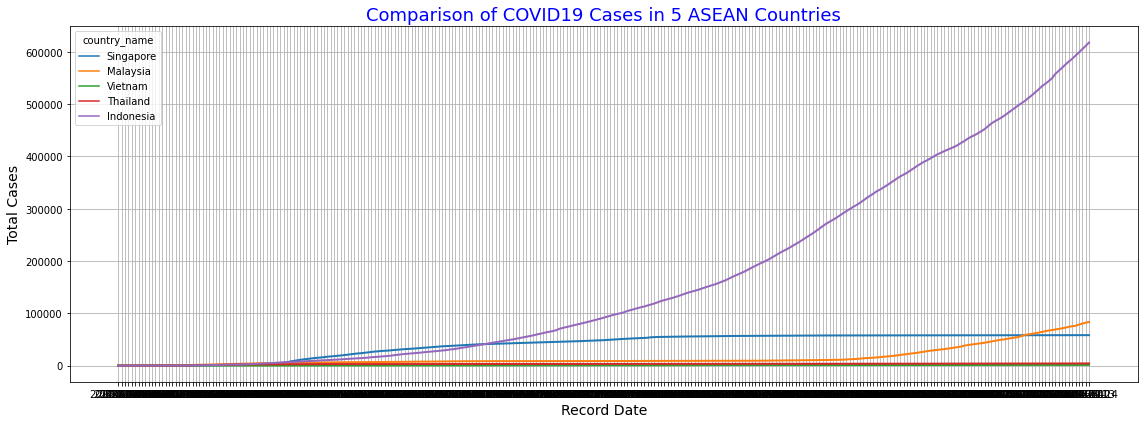

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\covid19_worldwide_2020.csv"
countries_url = r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science Project - Analisis Data COVID19 di Dunia & ASEAN\File Dokumentasi\FIle CSV\country_details.csv"

df_covid_worlwide = pd.read_csv(covid_url)
df_countries = pd.read_csv(countries_url)
df_covid_worlwide = df_covid_worlwide.set_index("date").sort_index().dropna()

df_covid_denormalized = pd.merge(df_covid_worlwide.reset_index(), df_countries, how="inner", on="geo_id").set_index("date").sort_index()

# display(df_covid_worlwide.head())
# display(df_countries.head())
# display(df_covid_denormalized)

asean_country_id = ["ID", "MY", "SG", "TH", "VN"]

df_covid_denormalized_asean = df_covid_denormalized.loc[df_covid_denormalized["geo_id"].isin(asean_country_id)].sort_index()
display(df_covid_denormalized_asean.head())

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index >= "2020-03-01"]
display(df_covid_denormalized_asean_march_onward.head())

df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean_march_onward.reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(
                data=df_covid_denormalized_asean_march_onward,
                x = "date",
                y = "confirmed_cases",
                hue = "country_name",
                linewidth = 2
            )
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()